In [1]:
from vnpy.app.spread_trading.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.spread_trading.strategies.statistical_arbitrage_strategy import (
    StatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_arbitrage_strategy import (
    BmArbitrageStrategy
)

from vnpy.app.spread_trading.strategies.basic_spread_strategy import (
    BasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_spread_strategy import (
    BmBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.spread_statistical_arbitrage_strategy import (
    SpreadStatisticalArbitrageStrategy
)
from vnpy.app.spread_trading.strategies.bm_multi_basic_spread_strategy import (
    BmMultiBasicSpreadStrategy
)
from vnpy.app.spread_trading.strategies.bm_basic_date_spread_strategy import (
    BmBasicDateSpreadStrategy
)
from vnpy.app.spread_trading.base import LegData, SpreadData
from datetime import datetime


In [2]:
spread = SpreadData(
    name="BM",
    legs=[LegData("BMCURRENT.BITMEX"), LegData("BMFORWARD.BITMEX")],
    price_multipliers={"BMCURRENT.BITMEX": -1, "BMFORWARD.BITMEX": 1},
    trading_multipliers={"BMCURRENT.BITMEX": -1, "BMFORWARD.BITMEX": 1},
    active_symbol="BMFORWARD.BITMEX",
#     inverse_contracts={"BMFORWARD.BITMEX": False, "BMCURRENT.BITMEX": False}, # 正向
    inverse_contracts={"BMFORWARD.BITMEX": True, "BMCURRENT.BITMEX": True},  #反向
    min_volume=1
)

In [3]:
engine = BacktestingEngine()
engine.set_parameters(
    spread=spread,
    interval="1m",
    start=datetime(2019,1, 14),
    end=datetime(2019, 12, 26),
    rate=0.00075,
    slippage=0.001,
    size=1,
    pricetick=0.2,
#     capital=1_000_000,
    capital = 100
    
)
# engine.add_strategy(StatisticalArbitrageStrategy, {})
# engine.add_strategy(SpreadStatisticalArbitrageStrategy, {}) #添加boll 差价 判读开仓

# engine.add_strategy(BmArbitrageStrategy, {})
# engine.add_strategy(BasicSpreadStrategy , {})
# engine.add_strategy(BmBasicSpreadStrategy, {"short_price": 150, "cover_price" : 50}) # 只远期开空，近期开多 符合平仓条件后，平空 平多
# engine.add_strategy(BmMultiBasicSpreadStrategy, {}) # 主动腿多空循环开仓
engine.add_strategy(BmBasicDateSpreadStrategy, {"short_price": 150, "cover_price" : 50, "start_days" : 3, "end_days": 5, "max_pos" : 50})


2019-12-09 00:11:57.795752	开始加载历史数据
2019-12-09 00:13:30.001269	历史数据加载完成，数据量：457279
2019-12-09 00:13:30.126236	策略初始化完成
2019-12-09 00:13:30.126376	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 09:34:00
 正常平仓时间 2019-06-22 09:34:00
 self.datetime 2019-06-22 09:39:00
 正常开仓时间 2019-06-22 09:39:00
 self.datetime 2019-06-22 10:24:00
 正常平仓时间 2019-06-22 10:24:00
 self.datetime 2019-06-22 10:39:00
 正常开仓时间 2019-06-22 10:39:00
 self.datetime 2019-06-22 20:51:00
 正常平仓时间 2019-06-22 20:51:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 正常平仓时间 2019-06-22 23:07:00
 self.datetime 2019-06-23 02:45:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 04:33:00
 正常平仓时间 2019-07-03 04:33:00
 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetim

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:375: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


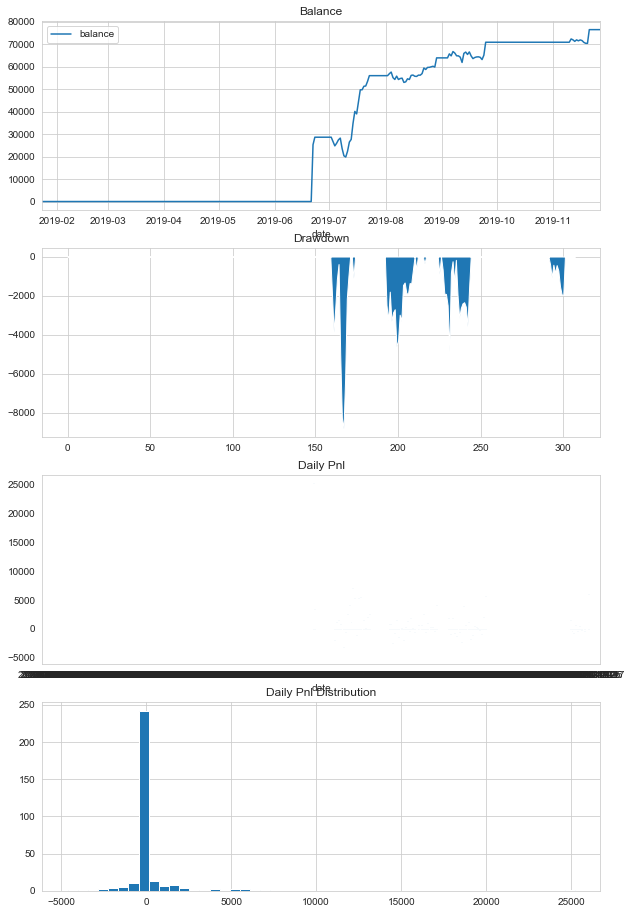

In [4]:
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()
engine.show_chart()

In [5]:
for trade in engine.trades.values():
    print(trade)

TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='5', tradeid='1', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=154.0, volume=50, time='2019-06-22 09:34:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='6', tradeid='2', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=42.0, volume=50, time='2019-06-22 09:39:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='7', tradeid='3', direction=<Direction.SHORT: '空'>, offset=<Offset.NONE: ''>, price=159.6, volume=50, time='2019-06-22 10:24:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='8', tradeid='4', direction=<Direction.LONG: '多'>, offset=<Offset.NONE: ''>, price=33.6, volume=50, time='2019-06-22 10:39:00')
TradeData(gateway_name='BACKTESTING', symbol='BM', exchange=<Exchange.LOCAL: 'LOCAL'>, orderid='9', trad

In [7]:
setting = OptimizationSetting()
print(setting.__dict__)
setting.set_target("total_return")
setting.add_parameter("cover_price", 0, 100, 10)
setting.add_parameter("short_price", 100, 300, 10)

# setting.add_parameter("atr_ma_length", 10, 30, 1)

engine.run_ga_optimization(setting)
# engine.run_optimization(setting)

{'params': {}, 'target_name': ''}
2019-12-09 00:17:41.056135	参数优化空间：231
2019-12-09 00:17:41.056217	每代族群总数：100
2019-12-09 00:17:41.056240	优良筛选个数：80
2019-12-09 00:17:41.056255	迭代次数：30
2019-12-09 00:17:41.056272	交叉概率：95%
2019-12-09 00:17:41.056291	突变概率：5%
jksjkfjs  {'cover_price': 30, 'short_price': 290}
2019-12-09 00:17:41.056412	开始加载历史数据
2019-12-09 00:17:41.056435	历史数据加载完成，数据量：457279
2019-12-09 00:17:41.195002	策略初始化完成
2019-12-09 00:17:41.195179	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-05 07:07:00
 正常平仓时间 2019-07-05 07:07:00
 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-10 10:32:00
 正常平仓时间 2019-08-10 10:32:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:17:45.827451	历史数据回放结束
201

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:375: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  max_drawdown_start = df["balance"][:max_drawdown_end].argmax()


 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 20:51:00
 正常平仓时间 2019-06-22 20:51:00
 self.datetime 2019-06-22 22:22:00
 正常开仓时间 2019-06-22 22:22:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 正常平仓时间 2019-06-22 23:07:00
 self.datetime 2019-06-23 00:00:00
 正常开仓时间 2019-06-23 00:00:00
 self.datetime 2019-06-23 12:22:00
 正常平仓时间 2019-06-23 12:22:00
 self.datetime 2019-06-23 22:18:00
 正常开仓时间 2019-06-23 22:18:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 06:18:00
 正常平仓时间 2019-07-03 06:18:00
 self.datetime 2019-07-14 23:46:00
 正常开仓时间 2019-07-14 23:46:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-15 08:28:00
 正常开仓时间 2019-07-15 08:28:00
 self.datetime 2019-07-16 08:38:00
 正常平仓时间 2019-07-16 08:38:00
 self.datetim

/Users/wudi/github/sqt/vnpy1/vnpy/app/spread_trading/backtesting.py:355: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 09:34:00
 正常平仓时间 2019-06-22 09:34:00
 self.datetime 2019-06-22 09:35:00
 正常开仓时间 2019-06-22 09:35:00
 self.datetime 2019-06-22 10:24:00
 正常平仓时间 2019-06-22 10:24:00
 self.datetime 2019-06-22 10:26:00
 正常开仓时间 2019-06-22 10:26:00
 self.datetime 2019-06-22 20:51:00
 正常平仓时间 2019-06-22 20:51:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 正常平仓时间 2019-06-22 23:07:00
 self.datetime 2019-06-23 00:27:00
 正常开仓时间 2019-06-23 00:27:00
 self.datetime 2019-06-23 12:02:00
 正常平仓时间 2019-06-23 12:02:00
 self.datetime 2019-06-24 05:45:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 04:33:00
 正常平仓时间 2019-07-03 04:33:00
 self.datetime 2019-07-14 23:47:00
 正常开仓时间 2019-07-14 23:47:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-15 11:57:00
 正常开仓时

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 02:00:00
 正常平仓时间 2019-07-03 02:00:00
 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 self.datetime 2019-07-15 00:36:00
 正常平仓时间 2019-07-15 00:36:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-18 19:28:00
 正常平仓时间 2019-07-18 19:28:00
 self.datetime 2019-07-18 22:40:00
 正常开仓时间 2019-07-18 22:40:00
 self.datetime 2019-07-18 22:46:00
 正常平仓时间 2019-07-18 22:46:00
 self.datetime 2019-07-23 03:44:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 self.datetime 2019-10-03 22:21:00
 正常平仓时间 2019-10-03 22:21:00
 self.datetime 2019-10-23 20:42:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-03 00:01:00
 正常平仓时间 2019-11-03 00:01:00
 self.datetime 2019-11-22 1

 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-12 21:18:00
 正常平仓时间 2019-09-12 21:18:00
 self.datetime 2019-09-14 05:38:00
 正常开仓时间 2019-09-14 05:38:00
 self.datetime 2019-09-19 11:02:00
 正常平仓时间 2019-09-19 11:02:00
 self.datetime 2019-09-25 03:04:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:19:03.698684	历史数据回放结束
2019-12-09 00:19:03.698840	开始计算逐日盯市盈亏
2019-12-09 00:19:03.702890	逐日盯市盈亏计算完成
2019-12-09 00:19:03.703046	开始计算策略统计指标
jksjkfjs  {'cover_price': 100, 'short_price': 200}
2019-12-09 00:19:03.709799	开始加载历史数据
2019-12-09 00:19:03.709831	历史数据加载完成，数据量：457279
2019-12-09 00:19:03.843503	策略初始化完成
2019-12-09 00:19:03.843644	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-22 12:14:00
 正常开仓时间 2019-08-22 12:14:00
 self.datetime 2019-08-22 12:16:00
 正常平仓时间 2019-08-22 12:16:00
 self.datetime 2019-08-22 12:17:00
 正常开仓时间 2019-08-22 12:17:00
 self.datetime 2019-08-22 12:18:00
 正常平仓时间 2019-08-22 12:18:00
 self.datetime 2019-08-22 14:28:00
 正常开仓时间 2019-08-22 14:28:00
 self.datetime 2019-08-22 14:34:00
 正常平仓时间 2019-08-22 14:34:00
 self.datetime 2019-08-23 00:59:00
 正常开仓时间 2019-08-23 00:59:00
 self.datetime 2019-08-23 01:04:00
 正常平仓时间 2019-08-23 01:04:00
 self.datetime 2019-08-23 10:05:00
 正常开仓时间 2019-08-23 10:05:00
 self.datetime 2019-08-23 10:11:00
 正常平仓时间 2019-08-23 10:11:00
 self.datetime 2019-08-24 11:13:00
 正常开仓时间 2019-08-24 11:13:00
 self.datetime 2019-08-24 11:34:00
 正常平仓时间 2019-08-24 11:34:00
 self.datetime 2019-08-24 12:40:00
 正常开仓时间 2019-08-24 12:40:00
 self.datetime 2019-08-24 12:48:00
 正常平仓时间 2019-08-24 12:48:00
 self.datetime 2019-08-24 1

 self.datetime 2019-09-14 18:24:00
 正常平仓时间 2019-09-14 18:24:00
 self.datetime 2019-09-14 19:05:00
 正常开仓时间 2019-09-14 19:05:00
 self.datetime 2019-09-14 19:28:00
 正常平仓时间 2019-09-14 19:28:00
 self.datetime 2019-09-14 20:15:00
 正常开仓时间 2019-09-14 20:15:00
 self.datetime 2019-09-14 20:16:00
 正常平仓时间 2019-09-14 20:16:00
 self.datetime 2019-09-14 20:18:00
 正常开仓时间 2019-09-14 20:18:00
 self.datetime 2019-09-14 20:27:00
 正常平仓时间 2019-09-14 20:27:00
 self.datetime 2019-09-14 20:28:00
 正常开仓时间 2019-09-14 20:28:00
 self.datetime 2019-09-15 00:53:00
 正常平仓时间 2019-09-15 00:53:00
 self.datetime 2019-09-15 01:00:00
 正常开仓时间 2019-09-15 01:00:00
 self.datetime 2019-09-15 02:13:00
 正常平仓时间 2019-09-15 02:13:00
 self.datetime 2019-09-15 02:14:00
 正常开仓时间 2019-09-15 02:14:00
 self.datetime 2019-09-15 02:37:00
 正常平仓时间 2019-09-15 02:37:00
 self.datetime 2019-09-15 04:48:00
 正常开仓时间 2019-09-15 04:48:00
 self.datetime 2019-09-15 04:57:00
 正常平仓时间 2019-09-15 04:57:00
 self.datetime 2019-09-15 05:05:00
 正常开仓时间 2019-09-15 0

 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-08 19:05:00
 正常平仓时间 2019-09-08 19:05:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-18 17:34:00
 正常平仓时间 2019-11-18 17:34:00
2019-12-09 00:19:18.646176	历史数据回放结束
2019-12-09 00:19:18.646337	开始计算逐日盯市盈亏
2019-12-09 00:19:18.649799	逐日盯市盈亏计算完成
2019-12-09 00:19:18.650014	开始计算策略统计指标
jksjkfjs  {'cover_price': 30, 'short_price': 260}
2019-12-09 00:19:18.657193	开始加载历史数据
2019-12-09 00:19:18.657225	历史数据加载完成，数据量：457279
2019-12-09 00:19:18.792332	策略初始化完成
2019-12-09 00:19:18.792480	开始回放历史数据
 正常平仓时间 2019-02-03 00:00:00
 self.datetime 2019-02-11 08:06:00
 正常开仓时间 2019-02-11 08:06:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-05 04:45:00
 正常平仓时间 2019-07-05 04:45:00
 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 正常开仓时间 2

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 02:59:00
 正常平仓时间 2019-07-03 02:59:00
 self.datetime 2019-07-17 01:10:00
 正常开仓时间 2019-07-17 01:10:00
 self.datetime 2019-07-18 20:16:00
 正常平仓时间 2019-07-18 20:16:00
 self.datetime 2019-09-25 04:27:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-03 00:06:00
 正常平仓时间 2019-11-03 00:06:00
2019-12-09 00:19:42.768962	历史数据回放结束
2019-12-09 00:19:42.769076	开始计算逐日盯市盈亏
2019-12-09 00:19:42.772430	逐日盯市盈亏计算完成
2019-12-09 00:19:42.772588	开始计算策略统计指标
jksjkfjs  {'cover_price': 50, 'short_price': 290}
2019-12-09 00:19:42.779385	开始加载历史数据
2019-12-09 00:19:42.779415	历史数据加载完成，数据量：457279
2019-12-09 00:19:42.914552	策略初始化完成
2019-12-09 00:19:42.914646	开始回放历史数据
 正常平仓时间 2019-02-03 00:00:00
 self.datetime 2019-02-11 08:06:00
 正常开仓时间 2019-02-11 08:06:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-05 07:07:00
 正常平仓时间 2

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-22 12:14:00
 正常开仓时间 2019-08-22 12:14:00
 self.datetime 2019-08-22 16:54:00
 正常平仓时间 2019-08-22 16:54:00
 self.datetime 2019-08-23 00:59:00
 正常开仓时间 2019-08-23 00:59:00
 self.datetime 2019-08-23 02:36:00
 正常平仓时间 2019-08-23 02:36:00
 self.datetime 2019-08-23 10:05:00
 正常开仓时间 2019-08-23 10:05:00
 self.datetime 2019-08-23 12:45:00
 正常平仓时间 2019-08-23 12:45:00
 self.datetime 2019-08-24 11:13:00
 正常开仓时间 2019-08-24 11:13:00
 self.datetime 2019-08-24 17:20:00
 正常平仓时间 2019-08-24 17:20:00
 self.datetime 2019-08-24 17:50:00
 正常开仓时间 2019-08-24 17:50:00
 self.datetime 2019-08-24 19:32:00
 正常平仓时间 2019-08-24 19:32:00
 self.datetime 2019-08-25 00:15:00
 正常开仓时间 2019-08-25 00:15:00
 self.datetime 2019-08-25 04:46:00
 正常平仓时间 2019-08-25 04:46:00
 self.datetime 2019-08-25 08:57:00
 正常开仓时间 2019-08-25 08:57:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00

 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 正常平仓时间 2019-06-22 23:07:00
 self.datetime 2019-06-23 02:45:00
 正常开仓时间 2019-06-23 02:45:00
 self.datetime 2019-06-23 14:30:00
 正常平仓时间 2019-06-23 14:30:00
 self.datetime 2019-06-24 14:09:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 08:01:00
 正常平仓时间 2019-07-03 08:01:00
 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-08 19:05:00
 正常平仓时间 2019-09-08 19:05:00
 self.datetim

 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-18 17:34:00
 正常平仓时间 2019-11-18 17:34:00
2019-12-09 00:20:54.264487	历史数据回放结束
2019-12-09 00:20:54.264654	开始计算逐日盯市盈亏
2019-12-09 00:20:54.268221	逐日盯市盈亏计算完成
2019-12-09 00:20:54.268374	开始计算策略统计指标
jksjkfjs  {'cover_price': 20, 'short_price': 220}
2019-12-09 00:20:54.275388	开始加载历史数据
2019-12-09 00:20:54.275423	历史数据加载完成，数据量：457279
2019-12-09 00:20:54.415687	策略初始化完成
2019-12-09 00:20:54.415888	开始回放历史数据
 正常平仓时间 2019-02-03 00:00:00
 self.datetime 2019-02-11 08:06:00
 正常开仓时间 2019-02-11 08:06:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 13:51:00
 正常平仓时间 2019-07-03 13:51:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 10:27:00
 正常平仓时间 2

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-22 12:14:00
 正常开仓时间 2019-08-22 12:14:00
 self.datetime 2019-08-22 12:54:00
 正常平仓时间 2019-08-22 12:54:00
 self.datetime 2019-08-22 14:28:00
 正常开仓时间 2019-08-22 14:28:00
 self.datetime 2019-08-22 15:24:00
 正常平仓时间 2019-08-22 15:24:00
 self.datetime 2019-08-23 00:59:00
 正常开仓时间 2019-08-23 00:59:00
 self.datetime 2019-08-23 01:21:00
 正常平仓时间 2019-08-23 01:21:00
 self.datetime 2019-08-23 10:05:00
 正常开仓时间 2019-08-23 10:05:00
 self.datetime 2019-08-23 10:20:00
 正常平仓时间 2019-08-23 10:20:00
 self.datetime 2019-08-24 11:13:00
 正常开仓时间 2019-08-24 11:13:00
 self.datetime 2019-08-24 14:08:00
 正常平仓时间 2019-08-24 14:08:00
 self.datetime 2019-08-24 15:20:00
 正常开仓时间 2019-08-24 15:20:00
 self.datetime 2019-08-24 16:18:00
 正常平仓时间 2019-08-24 16:18:00
 self.datetime 2019-08-24 17:18:00
 正常开仓时间 2019-08-24 17:18:00
 self.datetime 2019-08-24 17:20:00
 正常平仓时间 2019-08-24 17:20:00
 self.datetime 2019-08-24 1

 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-23 16:39:00
 正常平仓时间 2019-06-23 16:39:00
 self.datetime 2019-06-23 19:14:00
 正常开仓时间 2019-06-23 19:14:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 11:31:00
 正常平仓时间 2019-07-03 11:31:00
 self.datetime 2019-07-14 23:46:00
 正常开仓时间 2019-07-14 23:46:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 10:27:00
 正常平仓时间 2019-08-03 10:27:00
 self.datetime 2019-08-22 12:14:00
 正常开仓时间 2019-08-22 12:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-13 00:56:00
 正常平仓时间 2019-09-13 00:56:00
 self.datetime 2019-09-13 16:37:00
 正常开仓时间 2019-09-13 16:37:00
 self.datetime 2019-09-19 11:02:00
 正常平仓时间 2019-09-19 11:02:00
 self.datetime 2019-09-25 03:02:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 0

 self.datetime 2019-08-22 12:14:00
 正常开仓时间 2019-08-22 12:14:00
 正常开仓时间 2019-09-03 00:00:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:21:41.879814	历史数据回放结束
2019-12-09 00:21:41.880007	开始计算逐日盯市盈亏
2019-12-09 00:21:41.883188	逐日盯市盈亏计算完成
2019-12-09 00:21:41.883425	开始计算策略统计指标
jksjkfjs  {'cover_price': 30, 'short_price': 190}
2019-12-09 00:21:41.890073	开始加载历史数据
2019-12-09 00:21:41.890105	历史数据加载完成，数据量：457279
2019-12-09 00:21:42.021057	策略初始化完成
2019-12-09 00:21:42.021219	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 正常平仓时间 2019-06-22 23:07:00
 self.datetime 2019-06-23 03:36:00
 正常开仓时间 2019-06-23 03:36:00
 self.datetime 2019-06-23 14:54:00
 正常平仓时间 2019-06-23 14:54:00
 self.datetime 2019-06-24 14:09:00
 正常开仓时间 2

 self.datetime 2019-08-26 05:19:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-07 01:40:00
 正常开仓时间 2019-09-07 01:40:00
 self.datetime 2019-09-07 01:41:00
 正常平仓时间 2019-09-07 01:41:00
 self.datetime 2019-09-07 14:36:00
 正常开仓时间 2019-09-07 14:36:00
 self.datetime 2019-09-07 18:29:00
 正常平仓时间 2019-09-07 18:29:00
 self.datetime 2019-09-08 00:10:00
 正常开仓时间 2019-09-08 00:10:00
 self.datetime 2019-09-08 02:28:00
 正常平仓时间 2019-09-08 02:28:00
 self.datetime 2019-09-13 16:41:00
 正常开仓时间 2019-09-13 16:41:00
 self.datetime 2019-09-13 16:42:00
 正常平仓时间 2019-09-13 16:42:00
 self.datetime 2019-09-14 00:46:00
 正常开仓时间 2019-09-14 00:46:00
 self.datetime 2019-09-14 02:27:00
 正常平仓时间 2019-09-14 02:27:00
 self.datetime 2019-09-14 04:28:00
 正常开仓时间 2019-09-14 04:28:00
 self.datetime 2019-09-14 18:24:00
 正常平仓时间 2019-09-14 18:24:00
 self.datetime 2019-09-14 21:33:00
 正常开仓时间 2019-09-14 21:33:00
 self.datetime 2019-09-15 00:53:00
 正常平仓时间 2019-09-15 0

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-05 00:40:00
 正常平仓时间 2019-09-05 00:40:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-11 00:18:00
 正常平仓时间 2019-11-11 00:18:00
 self.datetime 2019-11-22 18:38:00
 正常开仓时间 2019-11-22 18:38:00
2019-12-09 00:22:34.362354	历史数据回放结束
2019-12-09 00:22:34.362527	开始计算逐日盯市盈亏
2019-12-09 00:22:34.365924	逐日盯市盈亏计算完成
2019-12-09 00:22:34.366171	开始计算策略统计指标
jksjkfjs  {'cover_price': 40, 'short_price': 290}
2019-12-09 00:22:34.372659	开始加载历史数据
2019-12-09 00:22:34.372689	历史数据加载完成，数据量：457279
2019-12-09 00:22:34.504108	策略初始化完成
2019-12-09 00:22:34.504278	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-05 07:07:00
 正常平仓时间 2

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 02:59:00
 正常平仓时间 2019-07-03 02:59:00
 self.datetime 2019-07-14 23:47:00
 正常开仓时间 2019-07-14 23:47:00
 self.datetime 2019-07-15 00:36:00
 正常平仓时间 2019-07-15 00:36:00
 self.datetime 2019-07-15 04:00:00
 正常开仓时间 2019-07-15 04:00:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-18 20:16:00
 正常平仓时间 2019-07-18 20:16:00
 self.datetime 2019-07-18 21:21:00
 正常开仓时间 2019-07-18 21:21:00
 self.datetime 2019-07-18 23:34:00
 正常平仓时间 2019-07-18 23:34:00
 self.datetime 2019-07-22 23:40:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-14 08:00:00
 正常开仓时间 2019-09-14 08:00:00
 self.datetime 2019-09-14 19:32:00
 正常平仓时间 2019-09-14 19:32:00
 self.datetime 2019-09-17 0

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-04 15:27:00
 正常平仓时间 2019-09-04 15:27:00
 self.datetime 2019-09-07 01:40:00
 正常开仓时间 2019-09-07 01:40:00
 self.datetime 2019-09-07 01:41:00
 正常平仓时间 2019-09-07 01:41:00
 self.datetime 2019-09-07 15:13:00
 正常开仓时间 2019-09-07 15:13:00
 self.datetime 2019-09-08 13:02:00
 正常平仓时间 2019-09-08 13:02:00
 self.datetime 2019-09-14 05:38:00
 正常开仓时间 2019-09-14 05:38:00
 self.datetime 2019-09-15 10:38:00
 正常平仓时间 2019-09-15 10:38:00
 self.datetime 2019-09-17 00:15:00
 正常开仓时间 2019-09-17 00:15:00
 self.datetime 2019-09-17 13:39:00
 正常平仓时间 2019-09-17 13:39:00
 self.datetime 2019-09-25 03:04:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-11 00:18:00
 正常平仓时间 2019-11-11 00:18:00
 self.datetime 2019-11-21 23:04:00
 正常开仓时间 2019-11-21 23:04:00
2019-12-09 00:23:21.698063	历史数据回放结束
2019-12-09 00:23:21.698257

 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 self.datetime 2019-05-17 11:05:00
 正常平仓时间 2019-05-17 11:05:00
 self.datetime 2019-05-17 12:12:00
 正常开仓时间 2019-05-17 12:12:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-17 01:28:00
 正常平仓时间 2019-06-17 01:28:00
 self.datetime 2019-06-17 03:07:00
 正常开仓时间 2019-06-17 03:07:00
 self.datetime 2019-06-17 03:35:00
 正常平仓时间 2019-06-17 03:35:00
 self.datetime 2019-06-17 03:38:00
 正常开仓时间 2019-06-17 03:38:00
 self.datetime 2019-06-17 23:45:00
 正常平仓时间 2019-06-17 23:45:00
 self.datetime 2019-06-17 23:46:00
 正常开仓时间 2019-06-17 23:46:00
 self.datetime 2019-06-18 15:22:00
 正常平仓时间 2019-06-18 15:22:00
 self.datetime 2019-06-18 15:53:00
 正常开仓时间 2019-06-18 15:53:00
 self.datetime 2019-06-19 05:36:00
 正常平仓时间 2019-06-19 05:36:00
 self.datetime 2019-06-19 05:52:00
 正常开仓时间 2019-06-19 05:52:00
 self.datetime 2019-06-22 07:40:00
 正常平仓时间 2019-06-22 07:40:00
 self.datetime 2019-06-22 10:41:00
 正常开仓时

 self.datetime 2019-07-17 01:10:00
 正常开仓时间 2019-07-17 01:10:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-09-25 04:27:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-19 02:18:00
 正常平仓时间 2019-11-19 02:18:00
2019-12-09 00:24:18.515902	历史数据回放结束
2019-12-09 00:24:18.516061	开始计算逐日盯市盈亏
2019-12-09 00:24:18.519480	逐日盯市盈亏计算完成
2019-12-09 00:24:18.519624	开始计算策略统计指标
jksjkfjs  {'cover_price': 100, 'short_price': 100}
2019-12-09 00:24:18.526867	开始加载历史数据
2019-12-09 00:24:18.526898	历史数据加载完成，数据量：457279
2019-12-09 00:24:18.660144	策略初始化完成
2019-12-09 00:24:18.660252	开始回放历史数据
 正常平仓时间 2019-02-03 00:00:00
 self.datetime 2019-02-11 08:06:00
 正常开仓时间 2019-02-11 08:06:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 self.datetime 2019-05-17 11:05:00
 正常平仓时间 2019-05-17 11:05:00
 self.datetime 2019-05-17 11:06:00
 正常开仓时间 2019-05-17 11:06:00
 正常开仓时间 2019-06-03 00:00:00
 self.da

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 01:23:00
 正常平仓时间 2019-07-03 01:23:00
 self.datetime 2019-07-03 01:24:00
 正常开仓时间 2019-07-03 01:24:00
 self.datetime 2019-07-03 01:56:00
 正常平仓时间 2019-07-03 01:56:00
 self.datetime 2019-07-03 01:57:00
 正常开仓时间 2019-07-03 01:57:00
 self.datetime 2019-07-03 02:00:00
 正常平仓时间 2019-07-03 02:00:00
 self.datetime 2019-07-03 02:01:00
 正常开仓时间 2019-07-03 02:01:00
 self.datetime 2019-07-03 02:04:00
 正常平仓时间 2019-07-03 02:04:00
 self.datetime 2019-07-03 02:05:00
 正常开仓时间 2019-07-03 02:05:00
 self.datetime 2019-07-03 02:07:00
 正常平仓时间 2019-07-03 02:07:00
 self.datetime 2019-07-03 02:08:00
 正常开仓时间 2019-07-03 02:08:00
 self.datetime 2019-07-03 02:10:00
 正常平仓时间 2019-07-03 02:10:00
 self.datetime 2019-07-03 02:12:00
 正常开仓时间 2019-07-03 02:12:00
 self.datetime 2019-07-03 02:13:00
 正常平仓时间 2019-07-03 02:13:00
 self.datetime 2019-07-03 02:16:00
 正常开仓时间 2019-07-03 02:16:00
 self.datetime 2019-07-03 02:17:00
 正常平仓时间 2019-07-03 02:17:00
 self.datetime 2019-07-03 0

 self.datetime 2019-07-21 18:08:00
 正常开仓时间 2019-07-21 18:08:00
 self.datetime 2019-07-21 18:09:00
 正常平仓时间 2019-07-21 18:09:00
 self.datetime 2019-07-21 18:22:00
 正常开仓时间 2019-07-21 18:22:00
 self.datetime 2019-07-21 18:23:00
 正常平仓时间 2019-07-21 18:23:00
 self.datetime 2019-07-21 18:42:00
 正常开仓时间 2019-07-21 18:42:00
 self.datetime 2019-07-21 18:44:00
 正常平仓时间 2019-07-21 18:44:00
 self.datetime 2019-07-21 18:49:00
 正常开仓时间 2019-07-21 18:49:00
 self.datetime 2019-07-21 18:50:00
 正常平仓时间 2019-07-21 18:50:00
 self.datetime 2019-07-21 19:03:00
 正常开仓时间 2019-07-21 19:03:00
 self.datetime 2019-07-21 19:04:00
 正常平仓时间 2019-07-21 19:04:00
 self.datetime 2019-07-21 19:10:00
 正常开仓时间 2019-07-21 19:10:00
 self.datetime 2019-07-21 19:11:00
 正常平仓时间 2019-07-21 19:11:00
 self.datetime 2019-07-21 19:16:00
 正常开仓时间 2019-07-21 19:16:00
 self.datetime 2019-07-21 19:17:00
 正常平仓时间 2019-07-21 19:17:00
 self.datetime 2019-07-21 19:19:00
 正常开仓时间 2019-07-21 19:19:00
 self.datetime 2019-07-21 19:20:00
 正常平仓时间 2019-07-21 1

 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 02:57:00
 正常平仓时间 2019-09-03 02:57:00
 self.datetime 2019-09-03 02:58:00
 正常开仓时间 2019-09-03 02:58:00
 self.datetime 2019-09-03 03:19:00
 正常平仓时间 2019-09-03 03:19:00
 self.datetime 2019-09-03 03:20:00
 正常开仓时间 2019-09-03 03:20:00
 self.datetime 2019-09-03 03:51:00
 正常平仓时间 2019-09-03 03:51:00
 self.datetime 2019-09-03 03:52:00
 正常开仓时间 2019-09-03 03:52:00
 self.datetime 2019-09-03 04:28:00
 正常平仓时间 2019-09-03 04:28:00
 self.datetime 2019-09-03 04:29:00
 正常开仓时间 2019-09-03 04:29:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-03 04:32:00
 正常开仓时间 2019-09-03 04:32:00
 self.datetime 2019-09-03 04:45:00
 正常平仓时间 2019-09-03 04:45:00
 self.datetime 2019-09-03 04:46:00
 正常开仓时间 2019-09-03 04:46:00
 self.datetime 2019-09-03 04:47:00
 正常平仓时间 2019-09-03 04:47:00
 self.datetime 2019-09-03 04:49:00
 正常开仓时间 2019-09-03 04:49:00
 self.datetime 2019-09-03 04:51:00
 正常平仓时间 2019-09-03 04:51:00
 self.datetime 2019-09-03 0

 正常平仓时间 2019-09-08 23:20:00
 self.datetime 2019-09-08 23:22:00
 正常开仓时间 2019-09-08 23:22:00
 self.datetime 2019-09-08 23:23:00
 正常平仓时间 2019-09-08 23:23:00
 self.datetime 2019-09-08 23:24:00
 正常开仓时间 2019-09-08 23:24:00
 self.datetime 2019-09-08 23:25:00
 正常平仓时间 2019-09-08 23:25:00
 self.datetime 2019-09-09 00:24:00
 正常开仓时间 2019-09-09 00:24:00
 self.datetime 2019-09-09 00:25:00
 正常平仓时间 2019-09-09 00:25:00
 self.datetime 2019-09-09 01:02:00
 正常开仓时间 2019-09-09 01:02:00
 self.datetime 2019-09-09 01:06:00
 正常平仓时间 2019-09-09 01:06:00
 self.datetime 2019-09-09 01:12:00
 正常开仓时间 2019-09-09 01:12:00
 self.datetime 2019-09-09 01:13:00
 正常平仓时间 2019-09-09 01:13:00
 self.datetime 2019-09-09 01:15:00
 正常开仓时间 2019-09-09 01:15:00
 self.datetime 2019-09-09 01:16:00
 正常平仓时间 2019-09-09 01:16:00
 self.datetime 2019-09-09 01:17:00
 正常开仓时间 2019-09-09 01:17:00
 self.datetime 2019-09-09 01:18:00
 正常平仓时间 2019-09-09 01:18:00
 self.datetime 2019-09-09 01:19:00
 正常开仓时间 2019-09-09 01:19:00
 self.datetime 2019-09-09 0

 self.datetime 2019-09-17 05:25:00
 正常平仓时间 2019-09-17 05:25:00
 self.datetime 2019-09-17 06:19:00
 正常开仓时间 2019-09-17 06:19:00
 self.datetime 2019-09-17 06:21:00
 正常平仓时间 2019-09-17 06:21:00
 self.datetime 2019-09-17 06:22:00
 正常开仓时间 2019-09-17 06:22:00
 self.datetime 2019-09-17 06:23:00
 正常平仓时间 2019-09-17 06:23:00
 self.datetime 2019-09-17 06:25:00
 正常开仓时间 2019-09-17 06:25:00
 self.datetime 2019-09-17 06:26:00
 正常平仓时间 2019-09-17 06:26:00
 self.datetime 2019-09-17 07:30:00
 正常开仓时间 2019-09-17 07:30:00
 self.datetime 2019-09-17 07:31:00
 正常平仓时间 2019-09-17 07:31:00
 self.datetime 2019-09-17 07:55:00
 正常开仓时间 2019-09-17 07:55:00
 self.datetime 2019-09-17 07:58:00
 正常平仓时间 2019-09-17 07:58:00
 self.datetime 2019-09-17 08:01:00
 正常开仓时间 2019-09-17 08:01:00
 self.datetime 2019-09-17 08:02:00
 正常平仓时间 2019-09-17 08:02:00
 self.datetime 2019-09-17 08:17:00
 正常开仓时间 2019-09-17 08:17:00
 self.datetime 2019-09-17 08:18:00
 正常平仓时间 2019-09-17 08:18:00
 self.datetime 2019-09-17 08:33:00
 正常开仓时间 2019-09-17 0

 self.datetime 2019-11-15 17:01:00
 正常开仓时间 2019-11-15 17:01:00
 self.datetime 2019-11-15 17:02:00
 正常平仓时间 2019-11-15 17:02:00
 self.datetime 2019-11-21 23:03:00
 正常开仓时间 2019-11-21 23:03:00
 self.datetime 2019-11-21 23:09:00
 正常平仓时间 2019-11-21 23:09:00
 self.datetime 2019-11-22 15:33:00
 正常开仓时间 2019-11-22 15:33:00
 self.datetime 2019-11-22 15:37:00
 正常平仓时间 2019-11-22 15:37:00
 self.datetime 2019-11-22 15:38:00
 正常开仓时间 2019-11-22 15:38:00
 self.datetime 2019-11-22 15:41:00
 正常平仓时间 2019-11-22 15:41:00
 self.datetime 2019-11-22 15:42:00
 正常开仓时间 2019-11-22 15:42:00
 self.datetime 2019-11-22 15:44:00
 正常平仓时间 2019-11-22 15:44:00
 self.datetime 2019-11-22 15:45:00
 正常开仓时间 2019-11-22 15:45:00
 self.datetime 2019-11-22 15:50:00
 正常平仓时间 2019-11-22 15:50:00
 self.datetime 2019-11-22 15:51:00
 正常开仓时间 2019-11-22 15:51:00
 self.datetime 2019-11-22 16:19:00
 正常平仓时间 2019-11-22 16:19:00
 self.datetime 2019-11-22 16:20:00
 正常开仓时间 2019-11-22 16:20:00
 self.datetime 2019-11-22 16:27:00
 正常平仓时间 2019-11-22 1

 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-05 05:00:00
 正常平仓时间 2019-07-05 05:00:00
 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-06 15:13:00
 正常平仓时间 2019-08-06 15:13:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:24:38.071709	历史数据回放结束
2019-12-09 00:24:38.071900	开始计算逐日盯市盈亏
2019-12-09 00:24:38.075247	逐日盯市盈亏计算完成
2019-12-09 00:24:38.075381	开始计算策略统计指标
jksjkfjs  {'cover_price': 10, 'short_price': 220}
2019-12-09 00:24:38.081851	开始加载历史数据
2019-12-09 00:24:38.081877	历史数据加载完成，数据量：457279
2019-12-09 00:24:38.207565	策略初始化完成
2019-12-09 00:24:38.207732	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 s

 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-18 20:16:00
 正常平仓时间 2019-07-18 20:16:00
 self.datetime 2019-07-18 22:40:00
 正常开仓时间 2019-07-18 22:40:00
 self.datetime 2019-07-19 00:14:00
 正常平仓时间 2019-07-19 00:14:00
 self.datetime 2019-09-02 05:34:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-03 18:15:00
 正常平仓时间 2019-11-03 18:15:00
2019-12-09 00:25:11.148286	历史数据回放结束
2019-12-09 00:25:11.148450	开始计算逐日盯市盈亏
2019-12-09 00:25:11.151954	逐日盯市盈亏计算完成
2019-12-09 00:25:11.152128	开始计算策略统计指标
jksjkfjs  {'cover_price': 50, 'short_price': 160}
2019-12-09 00:25:11.158743	开始加载历史数据
2019-12-09 00:25:11.158770	历史数据加载完成，数据量：457279
2019-12-09 00:25:11.294173	策略初始化完成
2019-12-09 00:25:11.294331	开始回放历史数据
 正常平仓时间 2019-02-03 00:00:00
 self.datetime 2019-02-11 08:06:00
 正常开仓时间 2019-02-11 08:06:00
 正常开仓时间 2019-03-03 00:0

 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 14:42:00
 正常平仓时间 2019-07-03 14:42:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-06 08:05:00
 正常平仓时间 2019-08-06 08:05:00
 self.datetime 2019-09-02 05:34:00
 正常开仓时间 2019-09-03 00:00:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:25:39.514062	历史数据回放结束
2019-12-09 00:25:39.514228	开始计算逐日盯市盈亏
2019-12-09 00:25:39.517655	逐日盯市盈亏计算完成
2019-12-09 00:25:39.517786	开始计算策略统计指标
jksjkfjs  {'cover_price': 60, 'short_price': 150}
2019-12-09 00:25:39.524377	开始加载历史数据
2019-12-09 00:25:39.524406	历史数据加载完成，数据量：457279
2019-12-09 00:25:39.649129	策略初始化完成
2019-12-09 00:25:39.649263	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 s

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 02:00:00
 正常平仓时间 2019-07-03 02:00:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-18 19:28:00
 正常平仓时间 2019-07-18 19:28:00
 self.datetime 2019-07-18 22:40:00
 正常开仓时间 2019-07-18 22:40:00
 self.datetime 2019-07-18 22:46:00
 正常平仓时间 2019-07-18 22:46:00
 self.datetime 2019-09-02 05:34:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 self.datetime 2019-10-03 22:21:00
 正常平仓时间 2019-10-03 22:21:00
 self.datetime 2019-10-23 20:42:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-03 00:01:00
 正常平仓时间 2019-11-03 00:01:00
2019-12-09 00:26:03.338419	历史数据回放结束
2019-12-09 00:26:03.338534	开始计算逐日盯市盈亏
2019-12-09 00:26:03.342196	逐日盯市盈亏计算完成
2019-12-09 00:26:03.342408	开始计算策略统计指标
jksjkfjs  {'cover_price': 40, 'short_price': 140}
2019-12-09 00:26:03.349827	开始加载历史数据
2019-12-09 00:26:03.349863	历史数据加载完成，数据量：457

 self.datetime 2019-09-14 05:38:00
 正常开仓时间 2019-09-14 05:38:00
 self.datetime 2019-09-15 09:52:00
 正常平仓时间 2019-09-15 09:52:00
 self.datetime 2019-09-17 00:15:00
 正常开仓时间 2019-09-17 00:15:00
 self.datetime 2019-09-17 05:02:00
 正常平仓时间 2019-09-17 05:02:00
 self.datetime 2019-09-25 03:04:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-03 18:15:00
 正常平仓时间 2019-11-03 18:15:00
 self.datetime 2019-11-21 23:04:00
 正常开仓时间 2019-11-21 23:04:00
 self.datetime 2019-11-21 23:27:00
 正常平仓时间 2019-11-21 23:27:00
 self.datetime 2019-11-22 18:03:00
 正常开仓时间 2019-11-22 18:03:00
2019-12-09 00:26:23.142655	历史数据回放结束
2019-12-09 00:26:23.142877	开始计算逐日盯市盈亏
2019-12-09 00:26:23.146438	逐日盯市盈亏计算完成
2019-12-09 00:26:23.146602	开始计算策略统计指标
jksjkfjs  {'cover_price': 80, 'short_price': 260}
2019-12-09 00:26:23.153169	开始加载历史数据
2019-12-09 00:26:23.153197	历史数据加载完成，数据量：457279
2019-12-09 00:26:23.280413	策略初始化完成
2019-12-09 00:26:23.280626	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:0

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 02:59:00
 正常平仓时间 2019-07-03 02:59:00
 self.datetime 2019-07-03 03:00:00
 正常开仓时间 2019-07-03 03:00:00
 self.datetime 2019-07-03 03:49:00
 正常平仓时间 2019-07-03 03:49:00
 self.datetime 2019-07-14 23:46:00
 正常开仓时间 2019-07-14 23:46:00
 self.datetime 2019-07-15 00:36:00
 正常平仓时间 2019-07-15 00:36:00
 self.datetime 2019-07-15 02:27:00
 正常开仓时间 2019-07-15 02:27:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-15 08:28:00
 正常开仓时间 2019-07-15 08:28:00
 self.datetime 2019-07-15 10:13:00
 正常平仓时间 2019-07-15 10:13:00
 self.datetime 2019-07-15 10:29:00
 正常开仓时间 2019-07-15 10:29:00
 self.datetime 2019-07-15 15:39:00
 正常平仓时间 2019-07-15 15:39:00
 self.datetime 2019-07-15 21:48:00
 正常开仓时间 2019-07-15 21:48:00
 self.datetime 2019-07-15 21:54:00
 正常平仓时间 2019-07-15 21:54:00
 self.datetime 2019-07-15 21:59:00
 正常开仓时间 2019-07-15 21:59:00
 self.datetime 2019-07-16 00:00:00
 正常平仓时间 2019-07-16 00:00:00
 self.datetime 2019-07-17 0

 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 10:27:00
 正常平仓时间 2019-08-03 10:27:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-13 05:27:00
 正常平仓时间 2019-09-13 05:27:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:26:51.601362	历史数据回放结束
2019-12-09 00:26:51.601530	开始计算逐日盯市盈亏
2019-12-09 00:26:51.604899	逐日盯市盈亏计算完成
2019-12-09 00:26:51.605057	开始计算策略统计指标
jksjkfjs  {'cover_price': 0, 'short_price': 120}
2019-12-09 00:26:51.611856	开始加载历史数据
2019-12-09 00:26:51.611889	历史数据加载完成，数据量：457279
2019-12-09 00:26:51.737134	策略初始化完成
2019-12-09 00:26:51.737368	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 self.datetime 2019-05-17 11:05:00
 正常平仓时间 2019-05-17 11:05:00
2019-12-09 00:26:56.406573	历史数据回放结束
2019-12-09 00:26:56.406701	开始计算逐日盯市盈亏
2019-12-09 00:26:56.410207	

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-25 20:51:00
 正常开仓时间 2019-08-25 20:51:00
 self.datetime 2019-08-25 20:55:00
 正常平仓时间 2019-08-25 20:55:00
 self.datetime 2019-08-25 22:17:00
 正常开仓时间 2019-08-25 22:17:00
 self.datetime 2019-08-25 22:26:00
 正常平仓时间 2019-08-25 22:26:00
 self.datetime 2019-08-25 22:31:00
 正常开仓时间 2019-08-25 22:31:00
 self.datetime 2019-08-25 23:45:00
 正常平仓时间 2019-08-25 23:45:00
 self.datetime 2019-08-26 01:05:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-03 04:33:00
 正常开仓时间 2019-09-03 04:33:00
 self.datetime 2019-09-03 09:30:00
 正常平仓时间 2019-09-03 09:30:00
 self.datetime 2019-09-03 10:06:00
 正常开仓时间 2019-09-03 10:06:00
 self.datetime 2019-09-03 13:41:00
 正常平仓时间 2019-09-03 13:41:00
 self.datetime 2019-09-03 18:05:00
 正常开仓时间 2019-09-03 18:05:00
 self.datetime 2019-09-03 18:24:00
 正常平仓时间 2019-09-03 18:24:00
 self.datetime 2019-09-07 0

 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 self.datetime 2019-07-15 00:36:00
 正常平仓时间 2019-07-15 00:36:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-18 20:16:00
 正常平仓时间 2019-07-18 20:16:00
 self.datetime 2019-07-18 22:40:00
 正常开仓时间 2019-07-18 22:40:00
 self.datetime 2019-07-19 00:14:00
 正常平仓时间 2019-07-19 00:14:00
 self.datetime 2019-07-23 03:44:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-03 18:15:00
 正常平仓时间 2019-11-03 18:15:00
2019-12-09 00:27:34.833610	历史数据回放结束
2019-12-09 00:27:34.833776	开始计算逐日盯市盈亏
2019-12-09 00:27:34.837255	逐日盯市盈亏计算完成
2019-12-09 00:27:34.837502	开始计算策略统计指标
jksjkfjs  {'cover_price': 0, 'short_price': 160}
2019-12-09 00:27:

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-25 20:51:00
 正常开仓时间 2019-08-25 20:51:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-05 00:40:00
 正常平仓时间 2019-09-05 00:40:00
 self.datetime 2019-09-07 01:40:00
 正常开仓时间 2019-09-07 01:40:00
 self.datetime 2019-09-08 19:05:00
 正常平仓时间 2019-09-08 19:05:00
 self.datetime 2019-09-09 02:55:00
 正常开仓时间 2019-09-09 02:55:00
 self.datetime 2019-09-10 20:16:00
 正常平仓时间 2019-09-10 20:16:00
 self.datetime 2019-09-13 16:41:00
 正常开仓时间 2019-09-13 16:41:00
 self.datetime 2019-09-13 16:42:00
 正常平仓时间 2019-09-13 16:42:00
 self.datetime 2019-09-14 00:43:00
 正常开仓时间 2019-09-14 00:43:00
 self.datetime 2019-09-17 16:53:00
 正常平仓时间 2019-09-17 16:53:00
 self.datetime 2019-09-25 03:04:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-11 00:18:00
 正常平仓时间 2019-11-11 00:18:00
 self.datetime 2019-11-11 00:37:00
 正常开仓时间 2019-11-11 00:37:00
 self.datetime 2019-11-13 15:29:00

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 01:23:00
 正常平仓时间 2019-07-03 01:23:00
 self.datetime 2019-07-14 23:48:00
 正常开仓时间 2019-07-14 23:48:00
 self.datetime 2019-07-15 00:36:00
 正常平仓时间 2019-07-15 00:36:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-18 19:20:00
 正常平仓时间 2019-07-18 19:20:00
 self.datetime 2019-07-18 22:40:00
 正常开仓时间 2019-07-18 22:40:00
 self.datetime 2019-07-18 22:46:00
 正常平仓时间 2019-07-18 22:46:00
 self.datetime 2019-07-23 03:44:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 02:57:00
 正常平仓时间 2019-09-03 02:57:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 self.datetime 2019-10-03 22:21:00
 正常平仓时间 2019-10-03 22:21:00
 self.datetime 2019-10-23 20:42:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-03 00:01:00
 正常平仓时间 2019-11-03 00:01:00
 self.datetime 2019-11-22 1

 self.datetime 2019-07-14 23:47:00
 正常开仓时间 2019-07-14 23:47:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-15 08:36:00
 正常开仓时间 2019-07-15 08:36:00
 self.datetime 2019-07-17 00:18:00
 正常平仓时间 2019-07-17 00:18:00
 self.datetime 2019-07-17 01:03:00
 正常开仓时间 2019-07-17 01:03:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:06:00
 正常平仓时间 2019-08-03 00:06:00
 self.datetime 2019-08-26 05:19:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-12 20:37:00
 正常平仓时间 2019-09-12 20:37:00
 self.datetime 2019-09-13 16:41:00
 正常开仓时间 2019-09-13 16:41:00
 self.datetime 2019-09-13 18:52:00
 正常平仓时间 2019-09-13 18:52:00
 self.datetime 2019-09-14 00:46:00
 正常开仓时间 2019-09-14 00:46:00
 self.datetime 2019-09-19 11:02:00
 正常平仓时间 2019-09-19 11:02:00
 self.datetime 2019-09-25 03:04:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:28:22.257770	历史数据回放结束
2019-12-09 00:28:22.257920	开始计算逐日盯市盈亏
2019-12-09 00:28:22.261529	逐日盯市盈亏计算完成
2019-12-09 00

 self.datetime 2019-07-15 14:30:00
 正常平仓时间 2019-07-15 14:30:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-18 19:28:00
 正常平仓时间 2019-07-18 19:28:00
 self.datetime 2019-07-18 21:03:00
 正常开仓时间 2019-07-18 21:03:00
 self.datetime 2019-07-18 22:35:00
 正常平仓时间 2019-07-18 22:35:00
 self.datetime 2019-07-18 22:36:00
 正常开仓时间 2019-07-18 22:36:00
 self.datetime 2019-07-18 22:46:00
 正常平仓时间 2019-07-18 22:46:00
 self.datetime 2019-07-19 05:29:00
 正常开仓时间 2019-07-19 05:29:00
 self.datetime 2019-07-19 07:19:00
 正常平仓时间 2019-07-19 07:19:00
 self.datetime 2019-07-22 23:38:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-07 01:40:00
 正常开仓时间 2019-09-07 01:40:00
 self.datetime 2019-09-07 01:41:00
 正常平仓时间 2019-09-07 01:41:00
 self.datetime 2019-09-07 15:13:00
 正常开仓时间 2019-09-07 1

 正常平仓时间 2019-02-03 00:00:00
 self.datetime 2019-02-11 08:06:00
 正常开仓时间 2019-02-11 08:06:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 正常平仓时间 2019-06-22 23:07:00
 self.datetime 2019-06-23 00:02:00
 正常开仓时间 2019-06-23 00:02:00
 self.datetime 2019-06-23 14:30:00
 正常平仓时间 2019-06-23 14:30:00
 self.datetime 2019-06-23 22:21:00
 正常开仓时间 2019-06-23 22:21:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 08:01:00
 正常平仓时间 2019-07-03 08:01:00
 self.datetime 2019-07-14 23:47:00
 正常开仓时间 2019-07-14 23:47:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-15 08:36:00
 正常开仓时间 2019-07-15 08:36:00
 self.datetime 2019-07-17 00:01:00
 正常平仓时间 2019-07-17 00:01:00
 self.datetime 2019-07-17 01:03:00
 正常开仓时间 2019-07-17 01:03:00
 正常开仓时间 2019-

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-05 11:11:00
 正常平仓时间 2019-08-05 11:11:00
 self.datetime 2019-08-26 05:19:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-13 16:26:00
 正常平仓时间 2019-09-13 16:26:00
 self.datetime 2019-09-13 16:41:00
 正常开仓时间 2019-09-13 16:41:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:29:20.427812	历史数据回放结束
2019-12-09 00:29:20.427925	开始计算逐日盯市盈亏
2019-12-09 00:29:20.431547	逐日盯市盈亏计算完成
2019-12-09 00:29:20.431760	开始计算策略统计指标
jksjkfjs  {'cover_price': 80, 'short_price': 130}
2019-12-09 00:29:20.438858	开始加载历史数据
2019-12-09 00:29:20.438889	历史数据加载完成，数据量：457279
2019-12-09 00:29:20.570554	策略初始化完成
2019-12-09 00:29:20.570657	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 self.datetime 2019-05-17 11:05:00
 正常平仓时间 2019-05-17 11:05:00
 self.datetime 2019-05-17 11:06:00
 正常开仓时间 2019-05-17 11:06:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 08:03:00
 正常平仓时间 2

 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 09:34:00
 正常平仓时间 2019-06-22 09:34:00
 self.datetime 2019-06-22 09:35:00
 正常开仓时间 2019-06-22 09:35:00
 self.datetime 2019-06-22 10:24:00
 正常平仓时间 2019-06-22 10:24:00
 self.datetime 2019-06-22 10:26:00
 正常开仓时间 2019-06-22 10:26:00
 self.datetime 2019-06-22 20:51:00
 正常平仓时间 2019-06-22 20:51:00
 self.datetime 2019-06-22 22:15:00
 正常开仓时间 2019-06-22 22:15:00
 self.datetime 2019-06-22 22:33:00
 正常平仓时间 2019-06-22 22:33:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 23:07:00
 正常平仓时间 2019-06-22 23:07:00
 self.datetime 2019-06-22 23:54:00
 正常开仓时间 2019-06-22 23:54:00
 self.datetime 2019-06-23 12:02:00
 正常平仓时间 2019-06-23 12:02:00
 self.datetime 2019-06-23 19:14:00
 正常开仓时间 2019-06-23 19:14:00
 self.datetime 2019-06-23 21:00:00
 正常平仓时间 2019-06-23 21:00:00
 self.datetime 2019-06-23 22:09:00
 正常开仓时间 2019-06-23 22:09:00
 正常开仓时

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 02:57:00
 正常平仓时间 2019-09-03 02:57:00
 self.datetime 2019-09-07 01:40:00
 正常开仓时间 2019-09-07 01:40:00
 self.datetime 2019-09-07 01:41:00
 正常平仓时间 2019-09-07 01:41:00
 self.datetime 2019-09-07 15:13:00
 正常开仓时间 2019-09-07 15:13:00
 self.datetime 2019-09-07 18:04:00
 正常平仓时间 2019-09-07 18:04:00
 self.datetime 2019-09-08 00:10:00
 正常开仓时间 2019-09-08 00:10:00
 self.datetime 2019-09-08 00:14:00
 正常平仓时间 2019-09-08 00:14:00
 self.datetime 2019-09-14 05:38:00
 正常开仓时间 2019-09-14 05:38:00
 self.datetime 2019-09-14 06:40:00
 正常平仓时间 2019-09-14 06:40:00
 self.datetime 2019-09-14 07:11:00
 正常开仓时间 2019-09-14 07:11:00
 self.datetime 2019-09-14 09:16:00
 正常平仓时间 2019-09-14 09:16:00
 self.datetime 2019-09-14 10:32:00
 正常开仓时间 2019-09-14 10:32:00
 self.datetime 2019-09-14 11:52:00
 正常平仓时间 2019-09-14 11:52:00
 self.datetime 2019-09-14 1

2019-12-09 00:29:53.874688	策略初始化完成
2019-12-09 00:29:53.874794	开始回放历史数据
 正常平仓时间 2019-02-03 00:00:00
 self.datetime 2019-02-11 08:06:00
 正常开仓时间 2019-02-11 08:06:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 self.datetime 2019-05-17 11:05:00
 正常平仓时间 2019-05-17 11:05:00
 self.datetime 2019-05-17 12:12:00
 正常开仓时间 2019-05-17 12:12:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-22 08:03:00
 正常平仓时间 2019-06-22 08:03:00
 self.datetime 2019-06-22 08:09:00
 正常开仓时间 2019-06-22 08:09:00
 self.datetime 2019-06-22 09:34:00
 正常平仓时间 2019-06-22 09:34:00
 self.datetime 2019-06-22 09:35:00
 正常开仓时间 2019-06-22 09:35:00
 self.datetime 2019-06-22 10:24:00
 正常平仓时间 2019-06-22 10:24:00
 self.datetime 2019-06-22 10:26:00
 正常开仓时间 2019-06-22 10:26:00
 self.datetime 2019-06-22 18:50:00
 正常平仓时间 2019-06-22 18:50:00
 self.datetime 2019-06-22 22:36:00
 正常开仓时间 2019-06-22 22:36:00
 self.datetime 2019-06-22 22:52:00
 正常平仓时间 2019-06-22 22:52:00
 self.datetime 2019-06-23 00:27:0

2019-12-09 00:30:08.480178	策略初始化完成
2019-12-09 00:30:08.480897	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 self.datetime 2019-05-17 11:05:00
 正常平仓时间 2019-05-17 11:05:00
 self.datetime 2019-05-17 12:12:00
 正常开仓时间 2019-05-17 12:12:00
 正常开仓时间 2019-06-03 00:00:00
 self.datetime 2019-06-17 01:28:00
 正常平仓时间 2019-06-17 01:28:00
 self.datetime 2019-06-17 01:40:00
 正常开仓时间 2019-06-17 01:40:00
 self.datetime 2019-06-17 03:35:00
 正常平仓时间 2019-06-17 03:35:00
 self.datetime 2019-06-17 03:38:00
 正常开仓时间 2019-06-17 03:38:00
 self.datetime 2019-06-17 23:45:00
 正常平仓时间 2019-06-17 23:45:00
 self.datetime 2019-06-17 23:46:00
 正常开仓时间 2019-06-17 23:46:00
 self.datetime 2019-06-18 15:22:00
 正常平仓时间 2019-06-18 15:22:00
 self.datetime 2019-06-18 15:23:00
 正常开仓时间 2019-06-18 15:23:00
 self.datetime 2019-06-19 05:36:00
 正常平仓时间 2019-06-19 05:36:00
 self.datetime 2019-06-19 05:37:00
 正常开仓时间 2019-06-19 05:37:00
 self.datetime 2019-06-22 07:40:0

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-25 20:51:00
 正常开仓时间 2019-08-25 20:51:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 04:31:00
 正常平仓时间 2019-09-03 04:31:00
 self.datetime 2019-09-03 04:33:00
 正常开仓时间 2019-09-03 04:33:00
 self.datetime 2019-09-03 21:12:00
 正常平仓时间 2019-09-03 21:12:00
 self.datetime 2019-09-07 01:40:00
 正常开仓时间 2019-09-07 01:40:00
 self.datetime 2019-09-07 01:41:00
 正常平仓时间 2019-09-07 01:41:00
 self.datetime 2019-09-07 12:28:00
 正常开仓时间 2019-09-07 12:28:00
 self.datetime 2019-09-08 09:52:00
 正常平仓时间 2019-09-08 09:52:00
 self.datetime 2019-09-09 02:55:00
 正常开仓时间 2019-09-09 02:55:00
 self.datetime 2019-09-09 07:42:00
 正常平仓时间 2019-09-09 07:42:00
 self.datetime 2019-09-13 16:41:00
 正常开仓时间 2019-09-13 16:41:00
 self.datetime 2019-09-13 16:42:00
 正常平仓时间 2019-09-13 16:42:00
 self.datetime 2019-09-14 00:43:00
 正常开仓时间 2019-09-14 00:43:00
 self.datetime 2019-09-15 09:52:00
 正常平仓时间 2019-09-15 09:52:00

 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-03 01:23:00
 正常平仓时间 2019-07-03 01:23:00
 self.datetime 2019-07-03 01:24:00
 正常开仓时间 2019-07-03 01:24:00
 self.datetime 2019-07-03 01:56:00
 正常平仓时间 2019-07-03 01:56:00
 self.datetime 2019-07-03 02:01:00
 正常开仓时间 2019-07-03 02:01:00
 self.datetime 2019-07-03 02:04:00
 正常平仓时间 2019-07-03 02:04:00
 self.datetime 2019-07-03 02:30:00
 正常开仓时间 2019-07-03 02:30:00
 self.datetime 2019-07-03 02:59:00
 正常平仓时间 2019-07-03 02:59:00
 self.datetime 2019-07-03 03:00:00
 正常开仓时间 2019-07-03 03:00:00
 self.datetime 2019-07-03 03:02:00
 正常平仓时间 2019-07-03 03:02:00
 self.datetime 2019-07-03 03:03:00
 正常开仓时间 2019-07-03 03:03:00
 self.datetime 2019-07-03 03:15:00
 正常平仓时间 2019-07-03 03:15:00
 self.datetime 2019-07-03 03:20:00
 正常开仓时间 2019-07-03 03:20:00
 self.datetime 2019-07-03 03:21:00
 正常平仓时间 2019-07-03 03:21:00
 self.datetime 2019-07-14 23:46:00
 正常开仓时间 2019-07-14 23:46:00
 self.datetime 2019-07-15 00:36:00
 正常平仓时间 2019-07-15 00:36:00
 self.datetime 2019-07-15 0

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-25 20:51:00
 正常开仓时间 2019-08-25 20:51:00
 self.datetime 2019-08-25 20:52:00
 正常平仓时间 2019-08-25 20:52:00
 self.datetime 2019-08-25 22:17:00
 正常开仓时间 2019-08-25 22:17:00
 self.datetime 2019-08-25 22:23:00
 正常平仓时间 2019-08-25 22:23:00
 self.datetime 2019-08-25 22:31:00
 正常开仓时间 2019-08-25 22:31:00
 self.datetime 2019-08-25 22:33:00
 正常平仓时间 2019-08-25 22:33:00
 self.datetime 2019-08-26 01:05:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-03 02:57:00
 正常平仓时间 2019-09-03 02:57:00
 self.datetime 2019-09-03 03:14:00
 正常开仓时间 2019-09-03 03:14:00
 self.datetime 2019-09-03 03:19:00
 正常平仓时间 2019-09-03 03:19:00
 self.datetime 2019-09-03 03:21:00
 正常开仓时间 2019-09-03 03:21:00
 self.datetime 2019-09-03 03:51:00
 正常平仓时间 2019-09-03 03:51:00
 self.datetime 2019-09-03 04:01:00
 正常开仓时间 2019-09-03 04:01:00
 self.datetime 2019-09-03 04:28:00
 正常平仓时间 2019-09-03 04:28:00
 self.datetime 2019-09-03 0

 self.datetime 2019-11-21 23:03:00
 正常开仓时间 2019-11-21 23:03:00
 self.datetime 2019-11-21 23:09:00
 正常平仓时间 2019-11-21 23:09:00
 self.datetime 2019-11-22 16:05:00
 正常开仓时间 2019-11-22 16:05:00
 self.datetime 2019-11-22 16:19:00
 正常平仓时间 2019-11-22 16:19:00
 self.datetime 2019-11-22 16:44:00
 正常开仓时间 2019-11-22 16:44:00
 self.datetime 2019-11-22 16:57:00
 正常平仓时间 2019-11-22 16:57:00
 self.datetime 2019-11-22 17:08:00
 正常开仓时间 2019-11-22 17:08:00
 self.datetime 2019-11-22 17:10:00
 正常平仓时间 2019-11-22 17:10:00
 self.datetime 2019-11-22 18:00:00
 正常开仓时间 2019-11-22 18:00:00
 self.datetime 2019-11-22 18:01:00
 正常平仓时间 2019-11-22 18:01:00
 self.datetime 2019-11-22 18:02:00
 正常开仓时间 2019-11-22 18:02:00
 self.datetime 2019-11-22 19:39:00
 正常平仓时间 2019-11-22 19:39:00
 self.datetime 2019-11-22 19:50:00
 正常开仓时间 2019-11-22 19:50:00
 self.datetime 2019-11-22 20:18:00
 正常平仓时间 2019-11-22 20:18:00
 self.datetime 2019-11-22 21:05:00
 正常开仓时间 2019-11-22 21:05:00
 self.datetime 2019-11-22 21:17:00
 正常平仓时间 2019-11-22 2

 self.datetime 2019-07-15 14:05:00
 正常平仓时间 2019-07-15 14:05:00
 self.datetime 2019-07-15 22:01:00
 正常开仓时间 2019-07-15 22:01:00
 self.datetime 2019-07-15 22:05:00
 正常平仓时间 2019-07-15 22:05:00
 self.datetime 2019-07-17 01:03:00
 正常开仓时间 2019-07-17 01:03:00
 self.datetime 2019-07-18 19:20:00
 正常平仓时间 2019-07-18 19:20:00
 self.datetime 2019-07-18 19:26:00
 正常开仓时间 2019-07-18 19:26:00
 self.datetime 2019-07-18 19:28:00
 正常平仓时间 2019-07-18 19:28:00
 self.datetime 2019-07-18 19:40:00
 正常开仓时间 2019-07-18 19:40:00
 self.datetime 2019-07-18 19:57:00
 正常平仓时间 2019-07-18 19:57:00
 self.datetime 2019-07-18 21:03:00
 正常开仓时间 2019-07-18 21:03:00
 self.datetime 2019-07-18 22:35:00
 正常平仓时间 2019-07-18 22:35:00
 self.datetime 2019-07-18 22:36:00
 正常开仓时间 2019-07-18 22:36:00
 self.datetime 2019-07-18 22:46:00
 正常平仓时间 2019-07-18 22:46:00
 self.datetime 2019-07-18 22:47:00
 正常开仓时间 2019-07-18 22:47:00
 self.datetime 2019-07-18 22:51:00
 正常平仓时间 2019-07-18 22:51:00
 self.datetime 2019-07-19 03:16:00
 正常开仓时间 2019-07-19 0

 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-08 19:05:00
 正常平仓时间 2019-09-08 19:05:00
 self.datetime 2019-09-14 08:00:00
 正常开仓时间 2019-09-14 08:00:00
 self.datetime 2019-09-18 10:11:00
 正常平仓时间 2019-09-18 10:11:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-19 02:18:00
 正常平仓时间 2019-11-19 02:18:00
 self.datetime 2019-11-21 23:04:00
 正常开仓时间 2019-11-21 23:04:00
2019-12-09 00:31:01.945194	历史数据回放结束
2019-12-09 00:31:01.945339	开始计算逐日盯市盈亏
2019-12-09 00:31:01.948626	逐日盯市盈亏计算完成
2019-12-09 00:31:01.948762	开始计算策略统计指标
5  	100   	[733771.49575]  	[113888.81125292]	[635858.215]	[866242.405]
jksjkfjs  {'cover_price': 0, 'short_price': 260}
2019-12-09 00:31:01.962839	开始加载历史数据
2019-12-09 00:31:01.962868	历史数据加载完成，数据量：457279
2019-12-09 00:31:02.097497	策略初始化完成
2019-12-09 00:31:02.097604	开始回放历史数据
 正常开仓时间 2019-02

 self.datetime 2019-07-14 23:47:00
 正常开仓时间 2019-07-14 23:47:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-15 08:36:00
 正常开仓时间 2019-07-15 08:36:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 09:40:00
 正常平仓时间 2019-08-03 09:40:00
 self.datetime 2019-08-26 05:19:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-12 21:18:00
 正常平仓时间 2019-09-12 21:18:00
 self.datetime 2019-09-13 16:41:00
 正常开仓时间 2019-09-13 16:41:00
 self.datetime 2019-09-19 11:02:00
 正常平仓时间 2019-09-19 11:02:00
 self.datetime 2019-09-25 03:04:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:31:35.275626	历史数据回放结束
2019-12-09 00:31:35.275785	开始计算逐日盯市盈亏
2019-12-09 00:31:35.279240	逐日盯市盈亏计算完成
2019-12-09 00:31:35.279413	开始计算策略统计指标
9  	100   	[866242.405]    	[0.]             	[866242.405]	[866242.405]
10 	100   	[866242.405]    	[0.]             	[866242.405]	[866242.405]
11 	100   	[866242.405]    	[0.]             	[866242.405]	[866242.405]
jksjkfjs  {

 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 self.datetime 2019-07-05 04:45:00
 正常平仓时间 2019-07-05 04:45:00
 self.datetime 2019-07-14 23:46:00
 正常开仓时间 2019-07-14 23:46:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-06 14:46:00
 正常平仓时间 2019-08-06 14:46:00
 self.datetime 2019-08-22 12:14:00
 正常开仓时间 2019-08-22 12:14:00
 正常开仓时间 2019-09-03 00:00:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
2019-12-09 00:32:08.994870	历史数据回放结束
2019-12-09 00:32:08.994996	开始计算逐日盯市盈亏
2019-12-09 00:32:08.998710	逐日盯市盈亏计算完成
2019-12-09 00:32:08.998878	开始计算策略统计指标
jksjkfjs  {'cover_price': 90, 'short_price': 230}
2019-12-09 00:32:09.006399	开始加载历史数据
2019-12-09 00:32:09.006430	历史数据加载完成，数据量：457279
2019-12-09 00:32:09.141581	策略初始化完成
2019-12-09 00:32:09.141728	开始回放历史数据
 正常开仓时间 2019-02-03 00:00:00
 正常开仓时间 2019-03-03 00:00:00
 正常开仓时间 2019-04-03 00:00:00
 正常开仓时间 2019-05-03 00:00:00
 正常开仓时间 2019-06-03 00:00:00
 正常开仓时间 2019-07-03 00:00:00
 s

 self.datetime 2019-07-14 23:47:00
 正常开仓时间 2019-07-14 23:47:00
 self.datetime 2019-07-15 08:27:00
 正常平仓时间 2019-07-15 08:27:00
 self.datetime 2019-07-17 01:04:00
 正常开仓时间 2019-07-17 01:04:00
 self.datetime 2019-07-21 07:25:00
 正常平仓时间 2019-07-21 07:25:00
 self.datetime 2019-07-22 23:40:00
 正常开仓时间 2019-08-03 00:00:00
 self.datetime 2019-08-03 00:01:00
 正常平仓时间 2019-08-03 00:01:00
 self.datetime 2019-08-29 02:14:00
 正常开仓时间 2019-09-03 00:00:00
 self.datetime 2019-09-08 19:05:00
 正常平仓时间 2019-09-08 19:05:00
 self.datetime 2019-09-14 08:00:00
 正常开仓时间 2019-09-14 08:00:00
 self.datetime 2019-09-18 00:09:00
 正常平仓时间 2019-09-18 00:09:00
 self.datetime 2019-09-25 03:06:00
 正常开仓时间 2019-10-03 00:00:00
 正常开仓时间 2019-11-03 00:00:00
 self.datetime 2019-11-18 17:34:00
 正常平仓时间 2019-11-18 17:34:00
 self.datetime 2019-11-21 23:04:00
 正常开仓时间 2019-11-21 23:04:00
2019-12-09 00:32:42.992891	历史数据回放结束
2019-12-09 00:32:42.993054	开始计算逐日盯市盈亏
2019-12-09 00:32:42.996433	逐日盯市盈亏计算完成
2019-12-09 00:32:42.996605	开始计算策略统计指标
jks

[({'cover_price': 100, 'short_price': 100}, 866242.4049999999, {})]